# __Visualización para análisis exporatorio__
# AE09. Seaborn Stripplot y Swarmplot

En este notebook veremos dos tipos de gráficas de `Seaborn` las cuales son excelentes alternativas para hacer gráficas categóricas utilizando puntos.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Importamos las librerías adicionales para el manejo numérico y de DataFrame
import numpy as np
import pandas as pd

In [9]:
sns.set(context='notebook',style='darkgrid',palette='dark')

En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
penguins_df = pd.read_csv("/content/drive/MyDrive/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## <font color='blue'>__Gráficas stripplot__</font>

El método `sns.stripplot` sitúa la variable categórica en el eje `x` y la variable cuantitativa en el eje `y`, mostrando con un punto cada uno de los valores. Para poder distinguir los puntos en el caso de que estén muy próximos, por defecto, se aplica un "temblor" (jitter) a los puntos para separarlos del eje vertical de forma aleatoria:

[Documentación stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot)


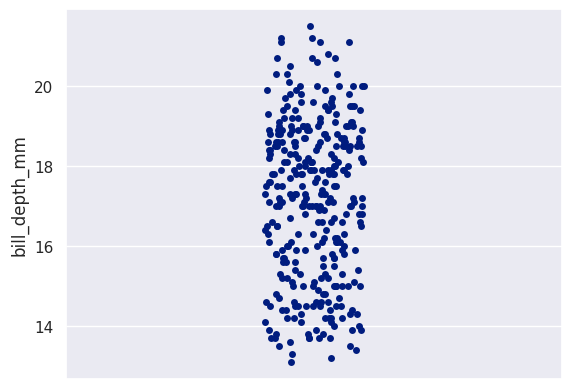

In [ ]:
sns.stripplot(y ='bill_depth_mm', data=penguins_df)
plt.show()

ejemplo de un cambio en el parámetro `jitter`:

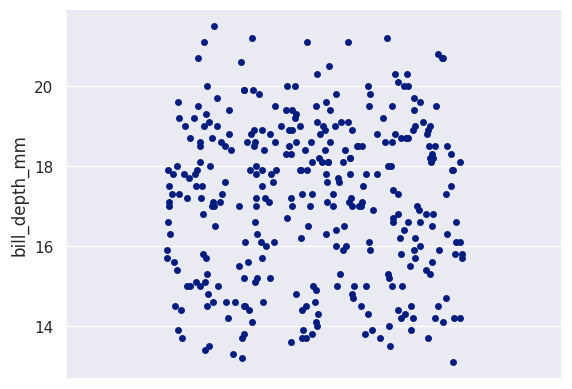

In [ ]:
sns.stripplot(y ='bill_depth_mm', data=penguins_df, jitter=0.3)
plt.show()

Podemos adicionar valores categóricos para realizar la separación de los puntos según categoría.

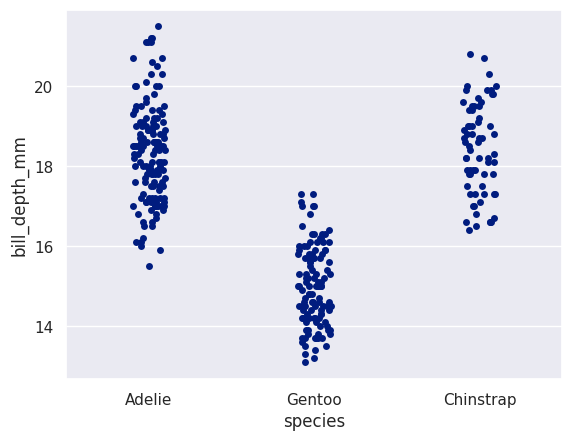

In [ ]:
sns.stripplot(x='species', y ='bill_depth_mm', data=penguins_df)
plt.show()

## <font color='blue'>__Gráficas swarmplot__</font>

El segundo método corresponde a `swarmplot` (gráfico de enjambre). Para poder realizar este gráfico hay que utilizar el método `sns.swarmplot`, el cual genera gráficos semejantes a los generados por `sns.stripplot`, pero aplicando a la posición de los puntos cierto algoritmo de forma que no solapen. Esto ofrece una mejor visualización a costa de dejar de ser útil para conjuntos de datos muy grandes:

[Documentación Swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot)


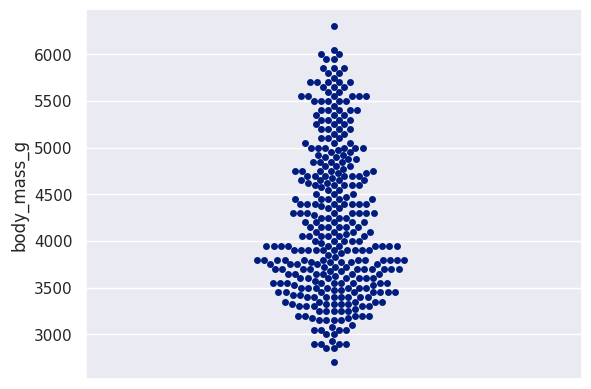

In [ ]:
sns.swarmplot(y ='body_mass_g', data=penguins_df)
plt.show()

Podemos adicionar valores categóricos para realizar la separación de los puntos según categoría. (de la misma forma que el stripplot)

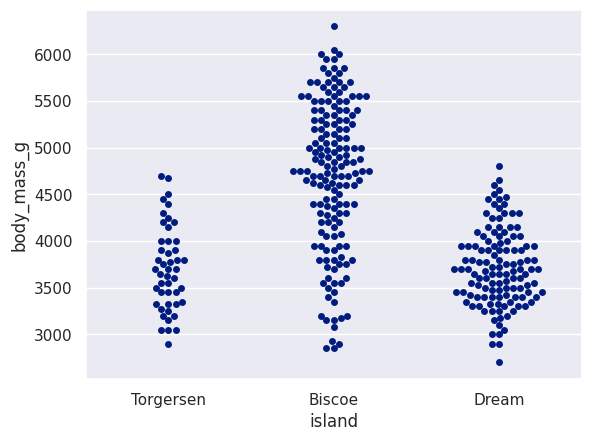

In [ ]:
sns.swarmplot(x='island', y ='body_mass_g', data=penguins_df)
plt.show()

Y recordar que también podemos pintar los puntos, dependiendo de alguna columna de nuestro interés

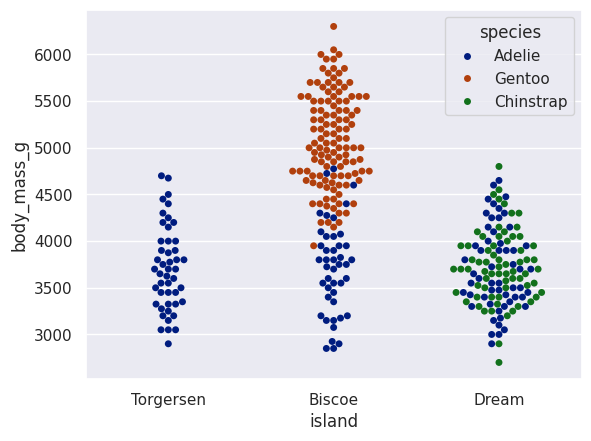

In [ ]:
sns.swarmplot(x='island', y ='body_mass_g', data=penguins_df, hue="species")
plt.show()

Se puede dibujar un diagrama de enjambre por sí solo, pero también es un buen complemento para un diagrama de caja o violín en los casos en los que desee mostrar todas las observaciones junto con alguna representación de la distribución subyacente.

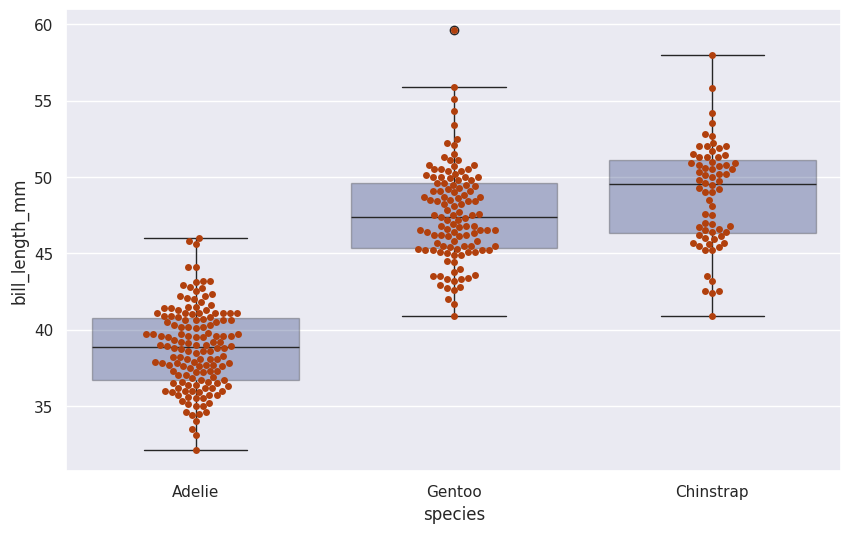

In [ ]:
# Para una mejor visualización le damos transparencia al boxplot, sin embargo, este método
# no tiene definido el parámetro 'alpha' en la API, pero si se puede lograr este efecto a
# través de kwargs que se transmiten a matplotlib
# Acá boxprop es un argumento de matplotlib
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='species', y='bill_length_mm', data=penguins_df, boxprops=dict(alpha=0.3))
ax = sns.swarmplot(x='species', y='bill_length_mm', data=penguins_df)
plt.show()

## <font color='blue'>__Ejercicios__</font>

### <font color='green'>__Actividad 1:__</font>

Para esta dinámica utilizaremos un set de datos de precios de diamantes (VD09.csv). La mayoría de las variables son auto explicativas a excepción de las variables `x`, `y`, `z`. Básicamente, estas variables hacen referencia al largo alto y ancho del diamante respectivamente. La idea es implementar la mayoría de los gráficos que hemos visto, con un par de diferencias:

1. Graficar la matriz de correlación para las distintas variables numéricas
2. Utilizando subplots genere 7 histogramas para las siguientes variables: carat, depth, table, price, x , y , z
3. Utilizando subplots genere 4 boxplots respetando las siguientes instrucciones:
    - Obtenga una muestra aleatoria del set de datos de los diamantes utilizando el método `diamonds_df.sample(100)`
    - Guarde esta muestra en una variable, utilícela para generar los gráficos
    - Genere los boxplots con una paleta de color pastel (puede que el parámetro `palette` puede ser de ayuda)
    - Para los dos primeros boxplots genere adicionalmente swarmplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?**
    - Para los dos últimos boxplots, genere adicionalmente stripplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo?**
4. Utilizando subplots, genere 4 barplots
    - Cuente cuantos diamantes hay para cada corte (`cut`)
    - Cuente cuantos diamantes hay para cada color
    - Genere el gráfico de barras de precio promedio en relación con la claridad del diamante
    - Genere el gráfico de barras de precio acumulado total en relación a la claridad del diamante **¿Que función de numpy suma todos los elementos de un arreglo?**


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo
sns.set(context='notebook', style='darkgrid', palette='pastel')


In [12]:
diamonds_df = pd.read_csv("/content/drive/MyDrive/VD09.csv")
diamonds_df.head()
# Tu código aquí ...


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


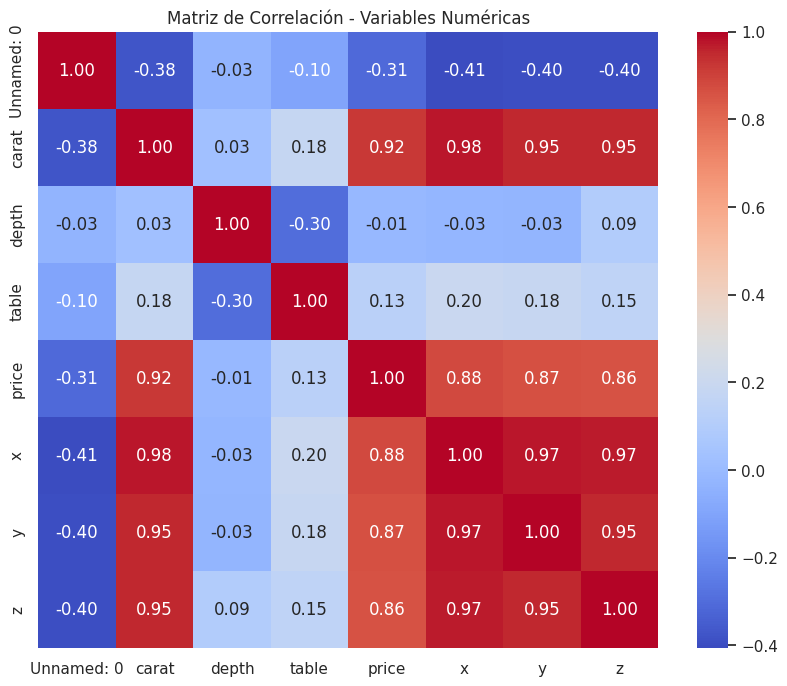

In [13]:
# 1. Graficar la matriz de correlación para las distintas variables numéricas
# Selección de variables numéricas
numeric_cols = diamonds_df.select_dtypes(include=['float64', 'int64'])

# Cálculo de la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Gráfico de calor con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

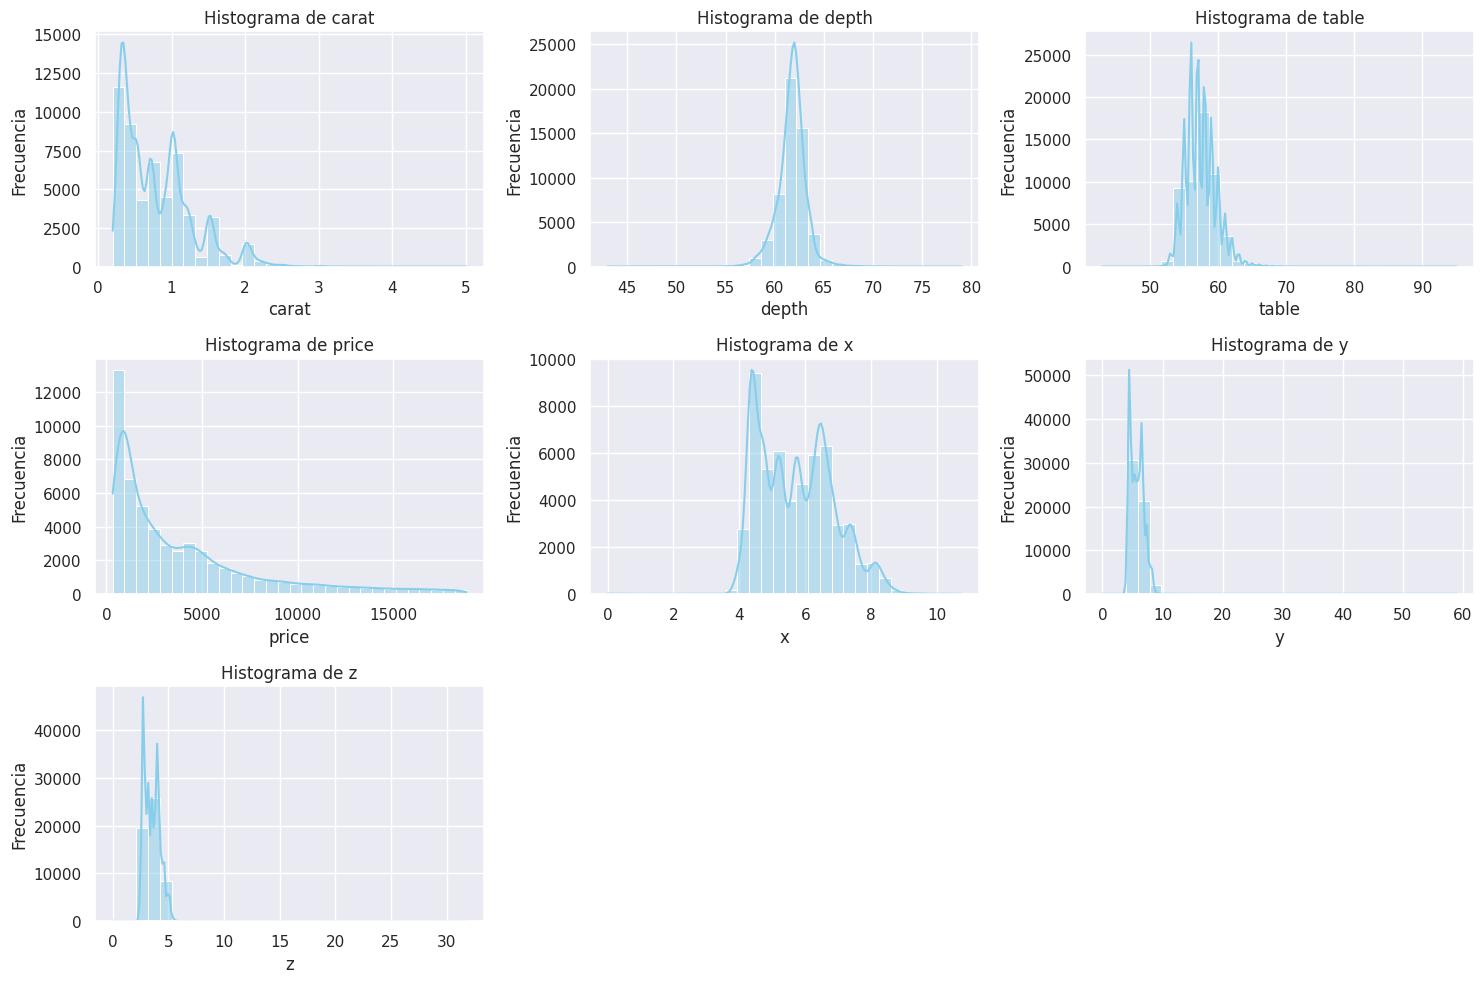

In [14]:
# 2. Utilizando subplots genere 7 histogramas para las siguientes variables: carat, depth, table, price, x , y , z
variables = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Configuración de subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(diamonds_df[var], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Histograma de {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frecuencia")

# Ocultar ejes sobrantes
for ax in axes[len(variables):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-15-17ba9fed9889>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sample_df, y='carat', palette='pastel', ax=axes[0])
<ipython-input-15-17ba9fed9889>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sample_df, y='price', palette='pastel', ax=axes[1])
<ipython-input-15-17ba9fed9889>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sample_df, y='depth', palette='pastel', ax=axes[2])
<ipython-input-15-17ba9fed9889>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

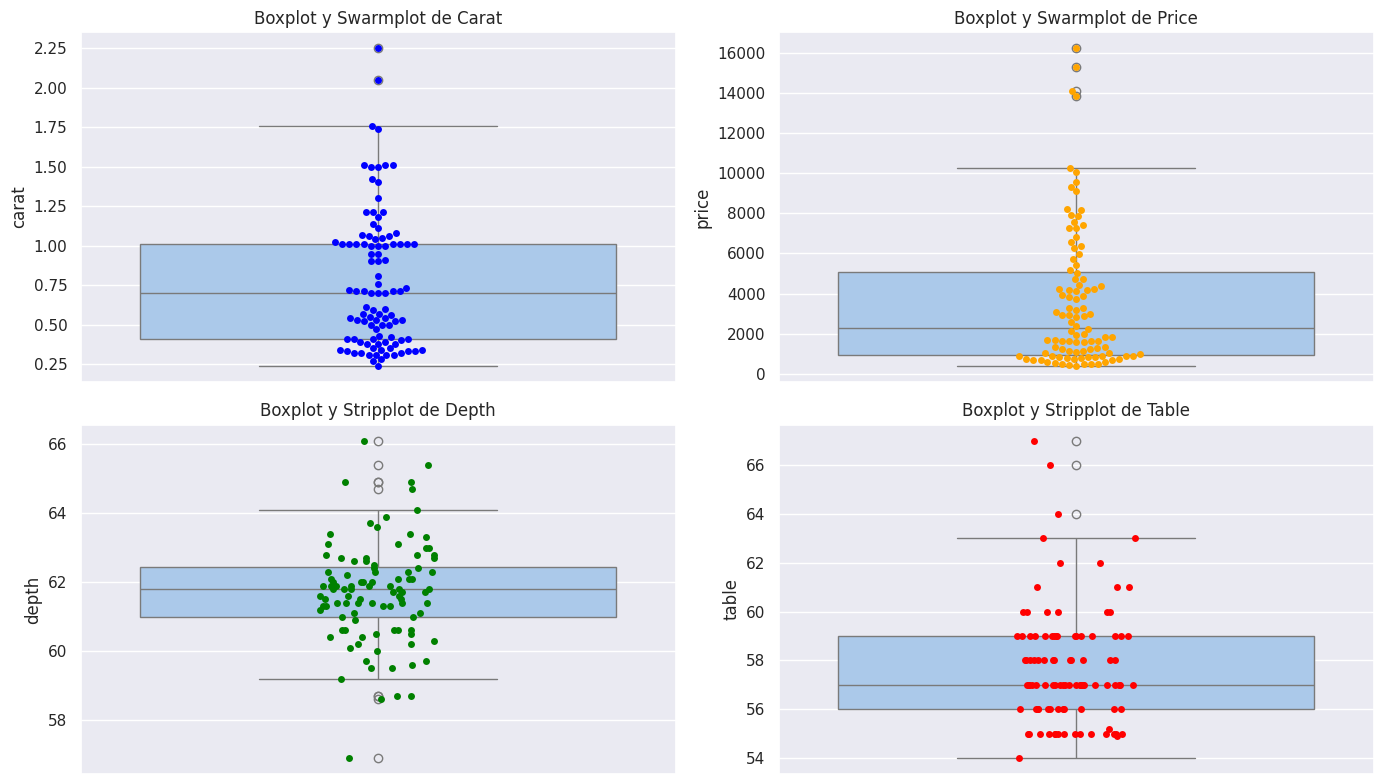

In [15]:
# 3.1 Utilizando subplots genere 4 boxplots respetando las siguientes instrucciones:
#Obtenga una muestra aleatoria del set de datos de los diamantes utilizando el método diamonds_df.sample(100)
sample_df = diamonds_df.sample(100)

#3.2 Guarde esta muestra en una variable, utilícela para generar los gráficos
#3.3 Genere los boxplots con una paleta de color pastel (puede que el parámetro palette puede ser de ayuda)
#3.4 Para los dos primeros boxplots genere adicionalmente swarmplots para
# las mismas variables utilizadas que los boxplots (y el set de datos muestreado)
# ¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?
#3.5 Para los dos últimos boxplots, genere adicionalmente stripplots para las mismas
#variables utilizadas que los boxplots (y el set de datos muestreado) ¿Surge algún warning de ejecución de codigo?

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

# Primer boxplot con swarmplot
sns.boxplot(data=sample_df, y='carat', palette='pastel', ax=axes[0])
sns.swarmplot(data=sample_df, y='carat', color='blue', ax=axes[0])
axes[0].set_title("Boxplot y Swarmplot de Carat")

# Segundo boxplot con swarmplot
sns.boxplot(data=sample_df, y='price', palette='pastel', ax=axes[1])
sns.swarmplot(data=sample_df, y='price', color='orange', ax=axes[1])
axes[1].set_title("Boxplot y Swarmplot de Price")

# Tercer boxplot con stripplot
sns.boxplot(data=sample_df, y='depth', palette='pastel', ax=axes[2])
sns.stripplot(data=sample_df, y='depth', color='green', ax=axes[2])
axes[2].set_title("Boxplot y Stripplot de Depth")

# Cuarto boxplot con stripplot
sns.boxplot(data=sample_df, y='table', palette='pastel', ax=axes[3])
sns.stripplot(data=sample_df, y='table', color='red', ax=axes[3])
axes[3].set_title("Boxplot y Stripplot de Table")

plt.tight_layout()
plt.show()

*¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?*

Si, existe un warning, que indica que estamos usando una funcionalidad de seaborn que, aunque actualmente funciona, será eliminada o modificada en una futura versión (a partir de la versión 0.14.0).

## <font color='purple'> __EXPERIMENTO__: </font>

### Visualización utilizando una muestra de 1000.
Muestra aleatoria del set de datos de los diamantes de 1000 observaciones

<ipython-input-16-02c8cce564d5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sample_df, y='carat', palette='pastel', ax=axes[0])
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-16-02c8cce564d5>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sample_df, y='price', palette='pastel', ax=axes[1])
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.w

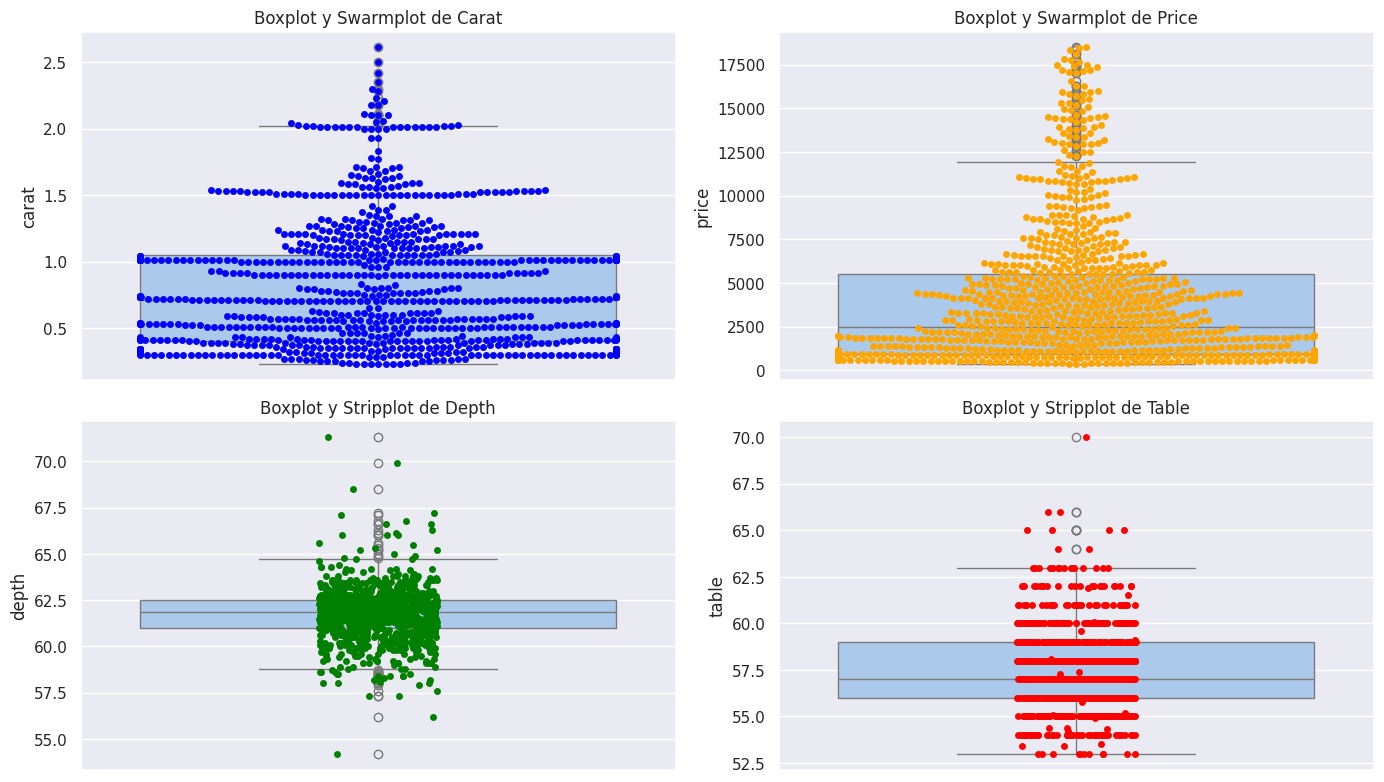

In [16]:

# 3.1 Utilizando subplots genere 4 boxplots respetando las siguientes instrucciones:
#Obtenga una muestra aleatoria del set de datos de los diamantes utilizando el método diamonds_df.sample(1000)
sample_df = diamonds_df.sample(1000)

#3.2 Guarde esta muestra en una variable, utilícela para generar los gráficos
#3.3 Genere los boxplots con una paleta de color pastel (puede que el parámetro palette puede ser de ayuda)
#3.4 Para los dos primeros boxplots genere adicionalmente swarmplots para
# las mismas variables utilizadas que los boxplots (y el set de datos muestreado)
# ¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?
#3.5 Para los dos últimos boxplots, genere adicionalmente stripplots para las mismas
#variables utilizadas que los boxplots (y el set de datos muestreado) ¿Surge algún warning de ejecución de codigo?

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

# Primer boxplot con swarmplot
sns.boxplot(data=sample_df, y='carat', palette='pastel', ax=axes[0])
sns.swarmplot(data=sample_df, y='carat', color='blue', ax=axes[0])
axes[0].set_title("Boxplot y Swarmplot de Carat")

# Segundo boxplot con swarmplot
sns.boxplot(data=sample_df, y='price', palette='pastel', ax=axes[1])
sns.swarmplot(data=sample_df, y='price', color='orange', ax=axes[1])
axes[1].set_title("Boxplot y Swarmplot de Price")

# Tercer boxplot con stripplot
sns.boxplot(data=sample_df, y='depth', palette='pastel', ax=axes[2])
sns.stripplot(data=sample_df, y='depth', color='green', ax=axes[2])
axes[2].set_title("Boxplot y Stripplot de Depth")

# Cuarto boxplot con stripplot
sns.boxplot(data=sample_df, y='table', palette='pastel', ax=axes[3])
sns.stripplot(data=sample_df, y='table', color='red', ax=axes[3])
axes[3].set_title("Boxplot y Stripplot de Table")

plt.tight_layout()
plt.show()

En este caso, a demás nos aparece otro warning, que nos dice que:

No hay suficiente espacio visual para posicionar todos los puntos correctamente. Esto suele suceder cuando:

- Hay demasiados puntos superpuestos.
- Los puntos son demasiado grandes para el espacio disponible.


personalmente, consideramos que utilizar esta muestra ensucia la visualización y no entrega necesariamente información adicional con respecto al análisis que se puede hacer con respecto a los datos. Por lo cual nos quedamos con la muestra de 100


### <font color='purple'>Fin experimento </font>


<Figure size 1500x1200 with 0 Axes>

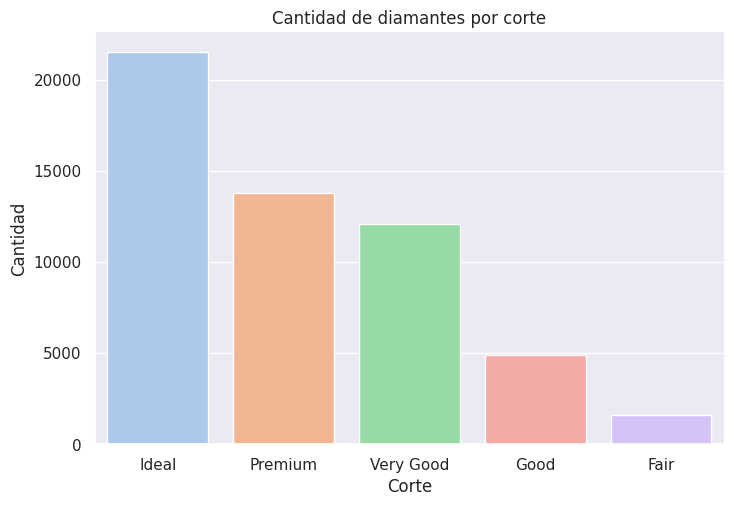

In [26]:
plt.figure(figsize=(15, 12))

# Contar la cantidad de diamantes por corte
cut_counts = diamonds_df['cut'].value_counts()

# Convertir a un DataFrame para usar con catplot
cut_counts_df = cut_counts.reset_index()
cut_counts_df.columns = ['cut', 'count']  # Renombrar columnas para claridad

# Crear el gráfico con catplot
sns.catplot(
    data=cut_counts_df,
    x='cut',
    y='count',
    hue='cut',  # Asignar 'cut' como hue
    kind='bar',
    palette='pastel',
    height=5,  # Altura del gráfico
    aspect=1.5,  # Proporción ancho/alto
    legend=False  # Ocultar leyenda si no es necesaria
)

plt.title("Cantidad de diamantes por corte")
plt.ylabel("Cantidad")
plt.xlabel("Corte")

plt.show()


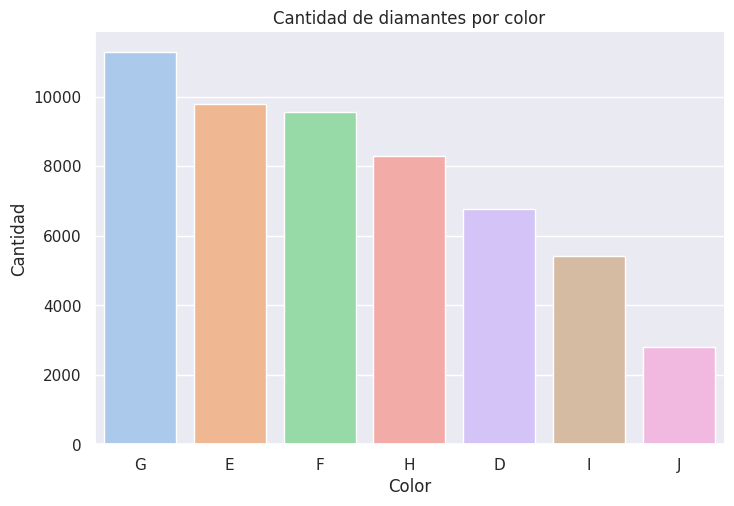

In [25]:
#4.2 Cuente cuantos diamantes hay para cada color

# Contar la cantidad de diamantes por color
color_counts = diamonds_df['color'].value_counts()

# Convertir a un DataFrame para usar con catplot
color_counts_df = color_counts.reset_index()
color_counts_df.columns = ['color', 'count']  # Renombrar columnas para claridad

# Crear el gráfico con catplot
sns.catplot(
    data=color_counts_df,
    x='color',
    y='count',
    hue='color',  # Asignar 'color' como hue
    kind='bar',
    palette='pastel',
    height=5,  # Altura del gráfico
    aspect=1.5,  # Proporción ancho/alto
    legend=False  # Ocultar leyenda si no es necesaria
)

plt.title("Cantidad de diamantes por color")
plt.ylabel("Cantidad")
plt.xlabel("Color")

plt.show()


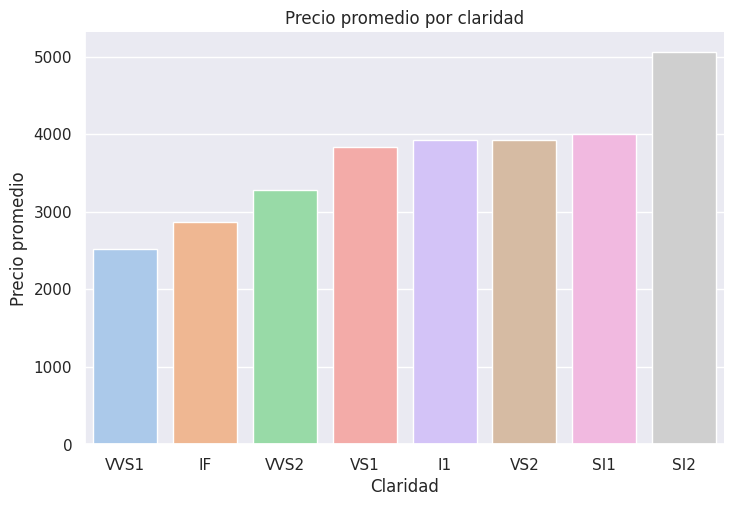

In [24]:
#4.3 Genere el gráfico de barras de precio promedio en relación con la claridad del diamante
# Tercer gráfico
# Agrupar los datos para calcular el precio promedio por claridad
clarity_avg_price = diamonds_df.groupby('clarity')['price'].mean().sort_values()

# Convertir a un DataFrame para usar con catplot
clarity_avg_price_df = clarity_avg_price.reset_index()

# Crear el gráfico con catplot
sns.catplot(
    data=clarity_avg_price_df,
    x='clarity',
    y='price',
    hue='clarity',  # Asignar la variable 'clarity' al hue
    kind='bar',
    palette='pastel',
    height=5,  # Altura del gráfico
    aspect=1.5,  # Proporción ancho/alto
    legend=False  # Ocultar la leyenda si no es necesaria
)

plt.title("Precio promedio por claridad")
plt.ylabel("Precio promedio")
plt.xlabel("Claridad")

plt.show()

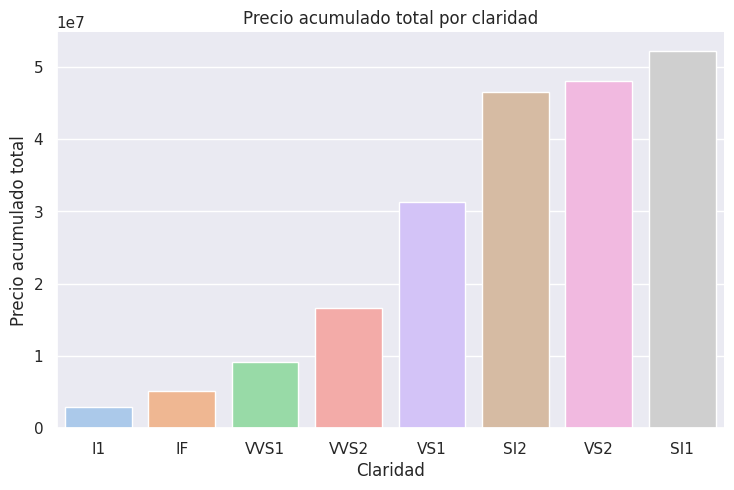

In [22]:
#4.4 Genere el gráfico de barras de precio acumulado total en relación a la claridad del diamante
#¿Que función de numpy suma todos los elementos de un arreglo? -> La función que suma todos los elementos de un arreglo en NumPy es np.sum().
# Cuarto gráfico
# Agrupando los datos
clarity_total_price = diamonds_df.groupby('clarity')['price'].sum().sort_values()

# Convertir el índice del DataFrame agrupado a una columna para usar en catplot
clarity_total_price_df = clarity_total_price.reset_index()

# Crear el gráfico con catplot
sns.catplot(
    data=clarity_total_price_df,
    x='clarity',
    y='price',
    hue='clarity',  # Asignamos la variable 'clarity' al hue
    kind='bar',
    palette='pastel',
    height=5,  # Altura del gráfico
    aspect=1.5,  # Proporción ancho/alto
    legend=False  # Ocultamos la leyenda porque no es necesaria
)

plt.title("Precio acumulado total por claridad")
plt.ylabel("Precio acumulado total")
plt.xlabel("Claridad")

plt.show()

*¿Que función de numpy suma todos los elementos de un arreglo?*

La función que suma todos los elementos de un arreglo en NumPy es **np.sum()**.

## <font color='purple'>__Material adicional__</font>
En el siguiente gráfico veremos como ingresar un **eje secundario** para mostrar dos variables con diferente unidad de medida y poder obtener algo de información adicional.

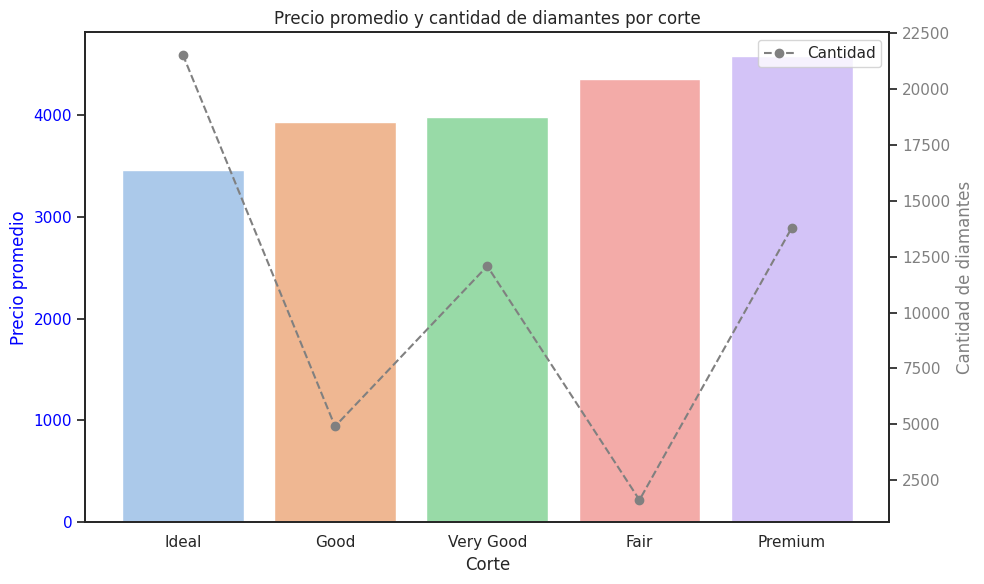

In [33]:
# Agrupar los datos para calcular el precio promedio por corte y cantidad de diamantes
avg_price_by_cut = diamonds_df.groupby('cut')['price'].mean().sort_values()
count_by_cut = diamonds_df['cut'].value_counts()

# Crear el DataFrame combinado para asegurar el orden
# en primer lugar convertimos avg_price_by_cut en un data frame y agregamos count_by_cut como columna
combined_df = avg_price_by_cut.reset_index()
combined_df['count'] = count_by_cut.loc[combined_df['cut']].values

# Configurar el estilo con fondo blanco y sin grilla
# al tener dos ejes y las barras más las líneas prefiero que no esté la grilla para tener un gráfico más prolijo
sns.set_style("white")

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para el precio promedio
# crear el gráfico de barras base, que mostrará el precio promedio por corte
sns.barplot(
    data=combined_df,
    x='cut',
    y='price',
    hue='cut',  # Asignar 'cut' como hue para evitar el warning
    palette='pastel',
    ax=ax1,
    dodge=False  # Para que las barras no se separen
)
ax1.set_ylabel("Precio promedio", color="blue")
ax1.set_xlabel("Corte")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_title("Precio promedio y cantidad de diamantes por corte")

# Crear un segundo eje y para la cantidad de diamantes
#luego crear el gráfico de líneas con eje secundario, partiendo por crear un segundo eje sobre el original
# y luego proporcionando el estilo que quiero
ax2 = ax1.twinx()
ax2.plot(combined_df['cut'], combined_df['count'], color="grey", marker="o", linestyle="--", label="Cantidad")
ax2.set_ylabel("Cantidad de diamantes", color="grey")
ax2.tick_params(axis='y', labelcolor="grey")

# Eliminar la grilla de ambos gráficos
ax1.grid(False)
ax2.grid(False)

# Mostrar la leyenda para el eje secundario, podría ponerse en diferentes posiciones pero para este caso será arriba a la derecha.
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

Este gráfico nos muestra que el diamante de corte Ideal es el más económico y el que presenta una mayor cantidad, sin embargo, el bueno reduce significativamente la cantidad, lo que podría deberse a que la diferencia en precio promedio es importante, no así para el muy buen corte, que presenta mayor cantidad que el bueno, lo que se puede deber a la leve diferencia hacia arriba en el precio. Lo mismo ocurre cuando miramos el Fair y el premium, mientras que el corte de tipo Fair reduce significativamente la cantidad (llegando a ser el de menor cantidad de todos los cortes), el premium aumenta segnificativamente en comparación a este, lo que se puede debe nuevamente a la leve diferencia de precio promedio entre estos dos cortes.

Como podemos ver, efectivamente este gráfico con dos ejes nos entrega información valiosa, donde nos damos cuenta que se esta llevando a cabo una estrategia de precios que está dando un buen resultado si lo que se busca es potenciar la cantidad de ciertos cortes, como el Ideal, Very good y Premium.

### <font color='purple'>Fin material adicional </font>

<font color='green'>Fin actividad 1</font>